In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
housedata = pd.read_csv("data.csv") 

In [4]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
%matplotlib inline

In [6]:
#housedata["TAXRM"] = housedata["TAX"]/housedata["RM"]
#housedata.head()

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

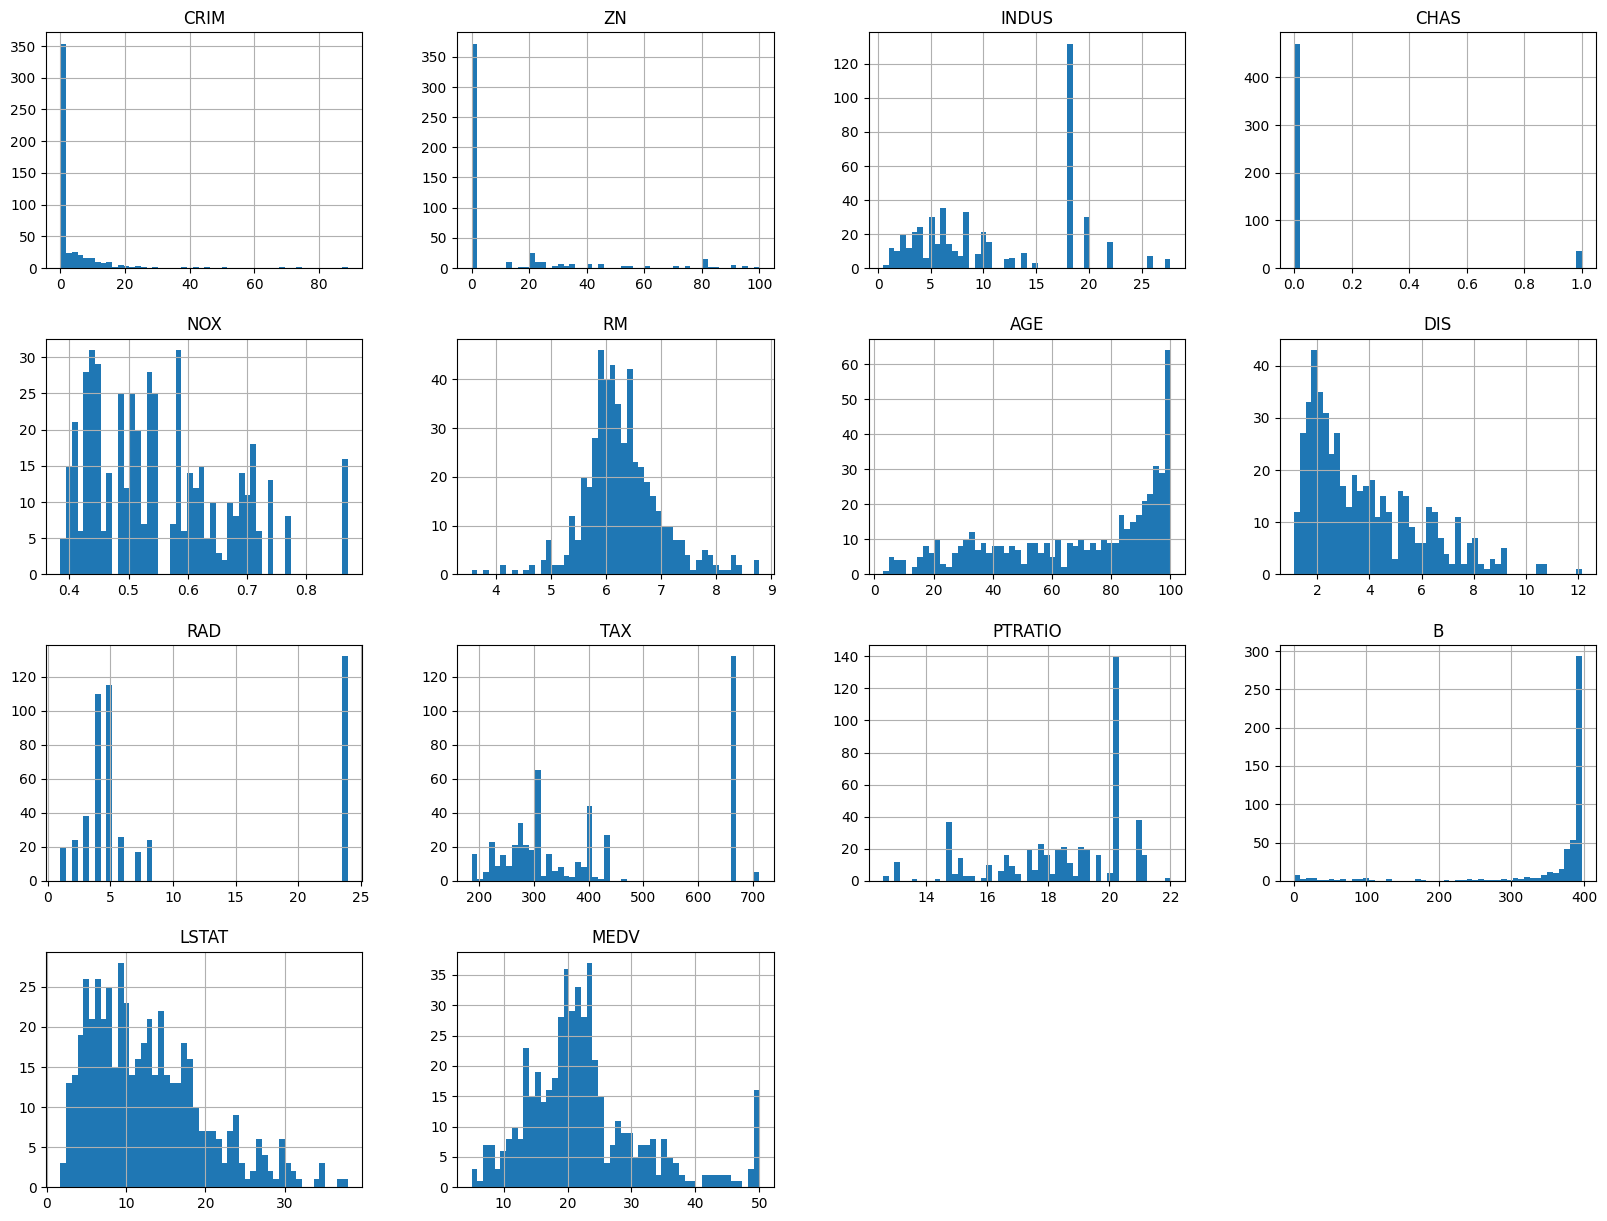

In [7]:
import matplotlib.pyplot as plt
housedata.hist(bins=50, figsize=(20,15))

In [8]:
from sklearn.model_selection import train_test_split as tts
trainset , testset = tts(housedata, test_size=0.2, random_state=42)
print(len(trainset))

404


In [9]:
housing_lables = trainset["MEDV"].copy()
t_lables = testset["MEDV"].copy()
trainset = trainset.drop("MEDV", axis = 1)
testset = testset.drop("MEDV", axis = 1)
housedata = housedata.drop("MEDV", axis = 1)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit as sss
split = sss(n_splits=1, test_size= 0.2, random_state=42)
for trindex, teindex in split.split(housedata, housedata['CHAS']):
    strainset = housedata.loc[trindex]
    stestset = housedata.loc[teindex]

In [11]:
corr_matrix = housedata.corr()
#corr_matrix['MEDV'].sort_values(ascending = False)

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

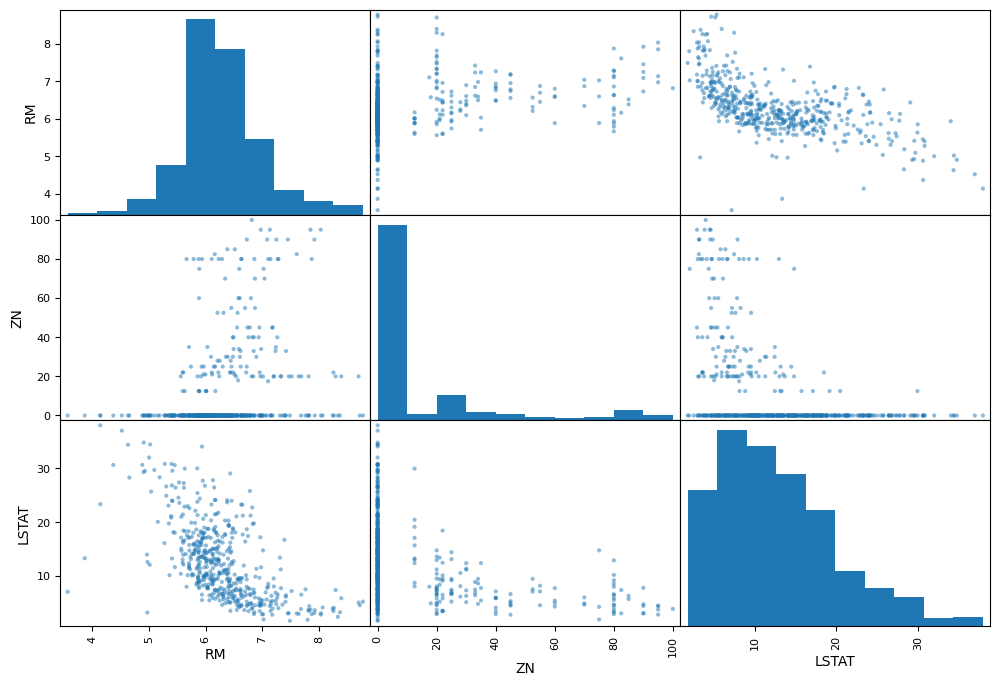

In [12]:
from pandas.plotting import scatter_matrix as sm
att = ["RM","ZN","LSTAT"] #"MEDV","TAXRM"
sm(housedata[att], figsize = (12,8))

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
imputer.fit(housedata)

SimpleImputer(strategy='median')

In [14]:
tr = imputer.transform(housedata)
trhousedata = pd.DataFrame(tr, columns=housedata.columns)
trhousedata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= "median")),
    ('std_scaler', StandardScaler()),
])

tr_num_housing = pipeline.fit_transform(trainset)

In [16]:
tr_num_housing.shape


(404, 13)

In [17]:
housedata.shape


(506, 13)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(tr_num_housing, housing_lables)

RandomForestRegressor()

In [19]:
sdata = trainset.iloc[:5]
slables = housing_lables.iloc[:5]
pdata = pipeline.transform(sdata)
model.predict(pdata)

array([12.587, 19.845, 20.055, 13.487, 18.495])

In [20]:
list(slables)

[12.0, 19.9, 19.4, 13.4, 18.2]

In [21]:
from joblib import dump, load
dump(model, 'RealEstate.joblib')

['RealEstate.joblib']

In [31]:
tdata = pipeline.transform(testset)
p = model.predict(tdata)
p

array([23.133, 31.005, 17.153, 23.516, 16.55 , 21.257, 19.411, 15.648,
       20.983, 20.673, 20.514, 19.792,  8.637, 21.442, 18.969, 27.075,
       19.303,  8.241, 45.825, 14.881, 24.172, 23.853, 14.666, 24.191,
       15.091, 14.637, 21.753, 13.332, 18.945, 20.626, 20.353, 23.016,
       30.43 , 20.572, 14.243, 15.827, 35.036, 19.277, 20.612, 24.206,
       19.184, 29.426, 45.996, 19.543, 22.046, 13.325, 15.007, 24.431,
       18.864, 28.361, 21.551, 33.341, 16.173, 25.571, 45.903, 21.749,
       15.753, 31.886, 21.904, 21.008, 21.894, 33.964, 29.605, 18.417,
       27.099, 16.486, 13.817, 23.169, 28.348, 14.872, 20.528, 28.87 ,
       10.362, 22.142, 21.766,  6.684, 20.104, 46.106, 10.644, 12.62 ,
       21.671, 12.6  , 19.743,  8.826, 20.548, 27.012, 15.131, 23.295,
       23.779, 18.137, 21.777,  7.819, 19.308, 19.162, 22.409, 19.781,
       37.863, 13.031, 12.362, 13.29 , 20.189, 23.53 ])

In [25]:
t_lables

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(t_lables, p)
rmse = np.sqrt(mse)
rmse

3.030945141532652

In [32]:
pdata[0]

array([ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
       -1.42863554,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
        0.84534281, -0.07433689,  1.75350503])